# DRL Complete Test

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def calculate_max_drawdown(returns):
    """
    Calculate the maximum drawdown from a series of returns.
    Handles potential numerical issues and invalid values.
    Args:
        returns (array-like): Daily or periodic returns of a portfolio.
    Returns:
        max_drawdown (float): Maximum drawdown (as a positive number).
    """
    # Ensure returns are a numpy array
    returns = np.array(returns)
    
    # Remove invalid values
    returns = returns[np.isfinite(returns)]

    # Handle edge case: if no valid returns, return NaN
    if len(returns) == 0:
        return np.nan

    # Calculate cumulative returns
    cumulative_returns = np.cumprod(1 + returns)

    # Clip cumulative returns to avoid numerical overflow
    cumulative_returns = np.clip(cumulative_returns, a_min=1e-10, a_max=1e10)

    # Calculate the running peak
    peak = np.maximum.accumulate(cumulative_returns)

    # Calculate drawdown
    drawdown = (cumulative_returns - peak) / peak

    # Calculate maximum drawdown (most negative drawdown value)
    max_drawdown = np.min(drawdown)

    # Return the absolute value of the maximum drawdown
    return abs(max_drawdown)

In [3]:
# Define the number of trading days per year
trading_days_per_year = 252

# Helper function to calculate stats
def calculate_portfolio_stats(returns):
    cumulative_return = np.cumprod(1 + returns)
    annualized_return = np.mean(returns) * trading_days_per_year
    annualized_volatility = np.std(returns) * np.sqrt(trading_days_per_year)
    sharpe_ratio = annualized_return / annualized_volatility if annualized_volatility != 0 else np.nan
    max_drawdown = calculate_max_drawdown(returns)
    calmar_ratio = annualized_return / max_drawdown if max_drawdown != 0 else np.nan

    return {
        "Final Cumulative Return": cumulative_return[-1],
        "Annualized Return": annualized_return,
        "Annualized Volatility": annualized_volatility,
        "Sharpe Ratio": sharpe_ratio,
        "Max Drawdown": max_drawdown,
        "Calmar Ratio": calmar_ratio
    }

## "Best" Model

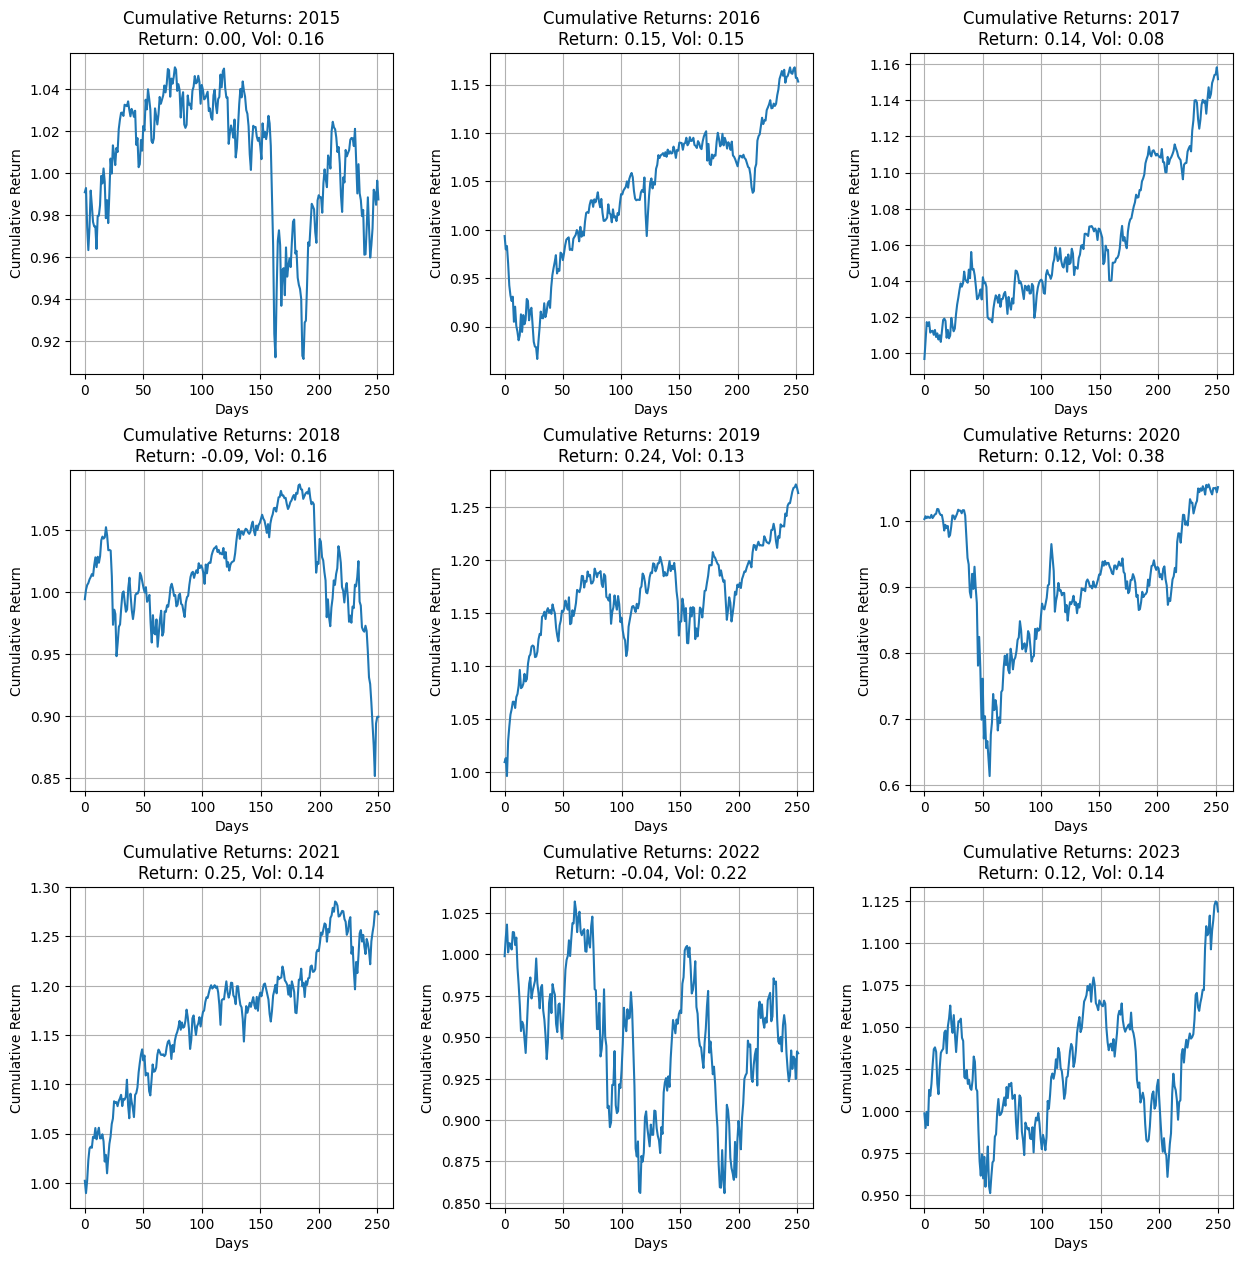

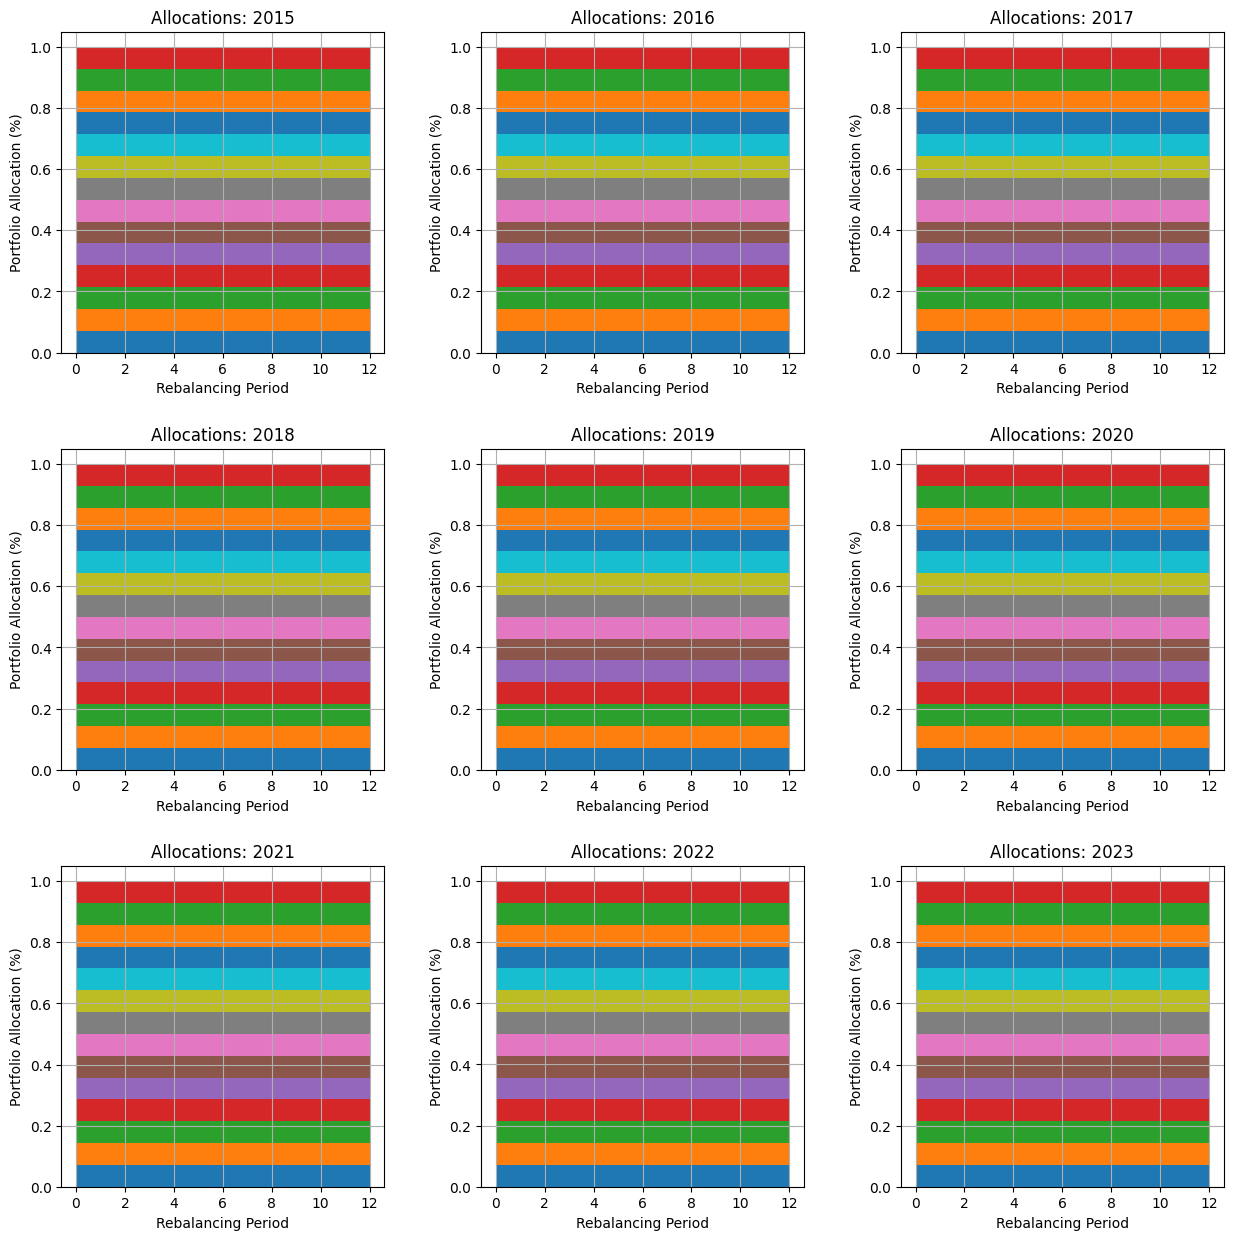

In [4]:
# Define the number of trading days per year
trading_days_per_year = 252

# Initialize lists to store statistics
all_stats = []

# Folder where the numpy files are stored
data_folder = "stats"

# Initialize a dictionary to hold imported data
all_portfolio_returns = {}
all_weight_history = {}

# Import data for "best" case
for i in range(1, 10):  # Periods 1 to 9
    returns_path = os.path.join(data_folder, f"best_portfolio_returns_7-{i}.npy")
    weights_path = os.path.join(data_folder, f"best_weight_history_7-{i}.npy")
    
    # Load the data
    portfolio_returns = np.load(returns_path)
    weight_history = np.load(weights_path)
    
    # Store in dictionaries
    all_portfolio_returns[i] = portfolio_returns
    all_weight_history[i] = weight_history

# Initialize a figure for the 3x3 grid layout
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Adjust size as needed
fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Add space between subplots

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop through each period for analysis
for idx, (period, returns) in enumerate(all_portfolio_returns.items()):
    # Calculate cumulative returns
    cumulative_return = np.cumprod(1 + returns)

    # Calculate annualized return
    annualized_return = np.mean(returns) * trading_days_per_year

    # Calculate annualized volatility
    annualized_volatility = np.std(returns) * np.sqrt(trading_days_per_year)

    # Calculate Sharpe ratio (assuming a risk-free rate of 0 for simplicity)
    sharpe_ratio = annualized_return / annualized_volatility if annualized_volatility != 0 else np.nan

    # Calculate the max drawdown
    max_drawdown = calculate_max_drawdown(returns)

    # Calculate Calmar ratio (handle divide by zero)
    calmar_ratio = annualized_return / max_drawdown if max_drawdown != 0 else np.nan

    # Store stats in a list
    all_stats.append({
        "Period": f"{2014 + idx + 1}",
        "Annualized Return": annualized_return,
        "Annualized Volatility": annualized_volatility,
        "Sharpe Ratio": sharpe_ratio,
        "Max Drawdown": max_drawdown,
        "Calmar Ratio": calmar_ratio
    })

    # Plot cumulative portfolio returns in the top row
    axes[idx].plot(cumulative_return)
    axes[idx].set_title(f"Cumulative Returns: {2015 + idx}\nReturn: {annualized_return:.2f}, Vol: {annualized_volatility:.2f}")
    axes[idx].set_xlabel("Days")
    axes[idx].set_ylabel("Cumulative Return")
    axes[idx].grid()

# Create a new figure for stacked area plots
fig_alloc, axes_alloc = plt.subplots(3, 3, figsize=(15, 15))  # Adjust size as needed
fig_alloc.subplots_adjust(hspace=0.3, wspace=0.3)  # Add space between subplots

# Flatten axes array for easy indexing
axes_alloc = axes_alloc.flatten()

# Loop through each period for allocation plots
for idx, (period, weight_history) in enumerate(all_weight_history.items()):
    num_rebalancing_periods, num_assets = weight_history.shape

    # Stacked area plot for portfolio allocations
    axes_alloc[idx].stackplot(range(num_rebalancing_periods), weight_history.T)
    axes_alloc[idx].set_title(f"Allocations: {2015 + idx}")
    axes_alloc[idx].set_xlabel("Rebalancing Period")
    axes_alloc[idx].set_ylabel("Portfolio Allocation (%)")
    axes_alloc[idx].grid()

# Show both figures
plt.show()

In [5]:
# Convert stats to a DataFrame for easier analysis and storage
stats_df = pd.DataFrame(all_stats)
stats_df

,Period,Annualized Return,Annualized Volatility,Sharpe Ratio,Max Drawdown,Calmar Ratio
0,2015,0.000083,0.159207,0.000524,0.132076,0.000632
1,2016,0.153202,0.150118,1.020542,0.127799,1.198771
2,2017,0.144180,0.076048,1.895909,0.036893,3.908069
3,2018,-0.093756,0.160107,-0.585580,0.217000,-0.432054
4,2019,0.242207,0.127045,1.906473,0.069386,3.490737
5,2020,0.123756,0.381130,0.324707,0.397925,0.311002
6,2021,0.251419,0.143503,1.752017,0.069324,3.626727
7,2022,-0.036863,0.222064,-0.166002,0.170716,-0.215933
8,2023,0.122917,0.141250,0.870211,0.109981,1.117618


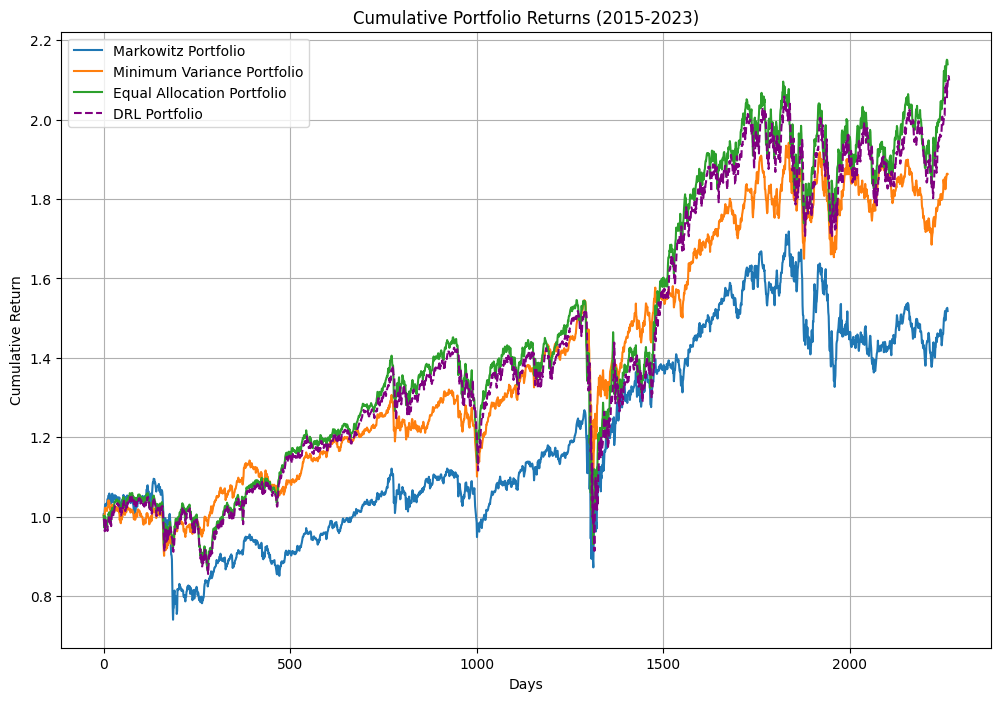

Final Cumulative Returns (2015-2023):
  Markowitz Portfolio: 1.5180
  Minimum Variance Portfolio: 1.8629
  Equal Allocation Portfolio: 2.1394
  DRL Portfolio: 2.0985


In [6]:
# Load the saved portfolio returns
marko_returns = np.load("stats/portfolio_returns_marko.npy")
mv_returns = np.load("stats/portfolio_returns_mv.npy")
equal_returns = np.load("stats/portfolio_returns_equal.npy")

# Append DRL portfolio returns for all periods
drl_returns = np.concatenate(list(all_portfolio_returns.values()))

# Calculate cumulative returns for each strategy
cumulative_returns_marko = np.cumprod(1 + marko_returns)
cumulative_returns_mv = np.cumprod(1 + mv_returns)
cumulative_returns_equal = np.cumprod(1 + equal_returns)
cumulative_returns_drl = np.cumprod(1 + drl_returns)

# Plot cumulative returns for all strategies
plt.figure(figsize=(12, 8))
plt.plot(cumulative_returns_marko, label="Markowitz Portfolio")
plt.plot(cumulative_returns_mv, label="Minimum Variance Portfolio")
plt.plot(cumulative_returns_equal, label="Equal Allocation Portfolio")
plt.plot(cumulative_returns_drl, label="DRL Portfolio", linestyle='--', color='purple')
plt.xlabel("Days")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Portfolio Returns (2015-2023)")
plt.grid()
plt.legend()
plt.show()

# Display the final cumulative returns for each strategy
final_cumulative_return_marko = cumulative_returns_marko[-1]
final_cumulative_return_mv = cumulative_returns_mv[-1]
final_cumulative_return_equal = cumulative_returns_equal[-1]
final_cumulative_return_drl = cumulative_returns_drl[-1]

print("Final Cumulative Returns (2015-2023):")
print(f"  Markowitz Portfolio: {final_cumulative_return_marko:.4f}")
print(f"  Minimum Variance Portfolio: {final_cumulative_return_mv:.4f}")
print(f"  Equal Allocation Portfolio: {final_cumulative_return_equal:.4f}")
print(f"  DRL Portfolio: {final_cumulative_return_drl:.4f}")

In [7]:
# Calculate stats for each portfolio
drl_stats = calculate_portfolio_stats(drl_returns)
markowitz_stats = calculate_portfolio_stats(marko_returns)
min_variance_stats = calculate_portfolio_stats(mv_returns)
equal_weight_stats = calculate_portfolio_stats(equal_returns)

# Combine stats into a DataFrame
stats_df = pd.DataFrame({
    "DRL Portfolio": drl_stats,
    "Markowitz Portfolio": markowitz_stats,
    "Minimum Variance Portfolio": min_variance_stats,
    "Equal Weight Portfolio": equal_weight_stats
}).T

stats_df

,Final Cumulative Return,Annualized Return,Annualized Volatility,Sharpe Ratio,Max Drawdown,Calmar Ratio
DRL Portfolio,2.098470,0.100903,0.191920,0.525756,0.397925,0.253573
Markowitz Portfolio,1.518049,0.063587,0.184459,0.344723,0.324021,0.196244
Minimum Variance Portfolio,1.862903,0.080247,0.147926,0.542482,0.299670,0.267784
Equal Weight Portfolio,2.139356,0.103222,0.192047,0.537484,0.397926,0.259400


## Last Model

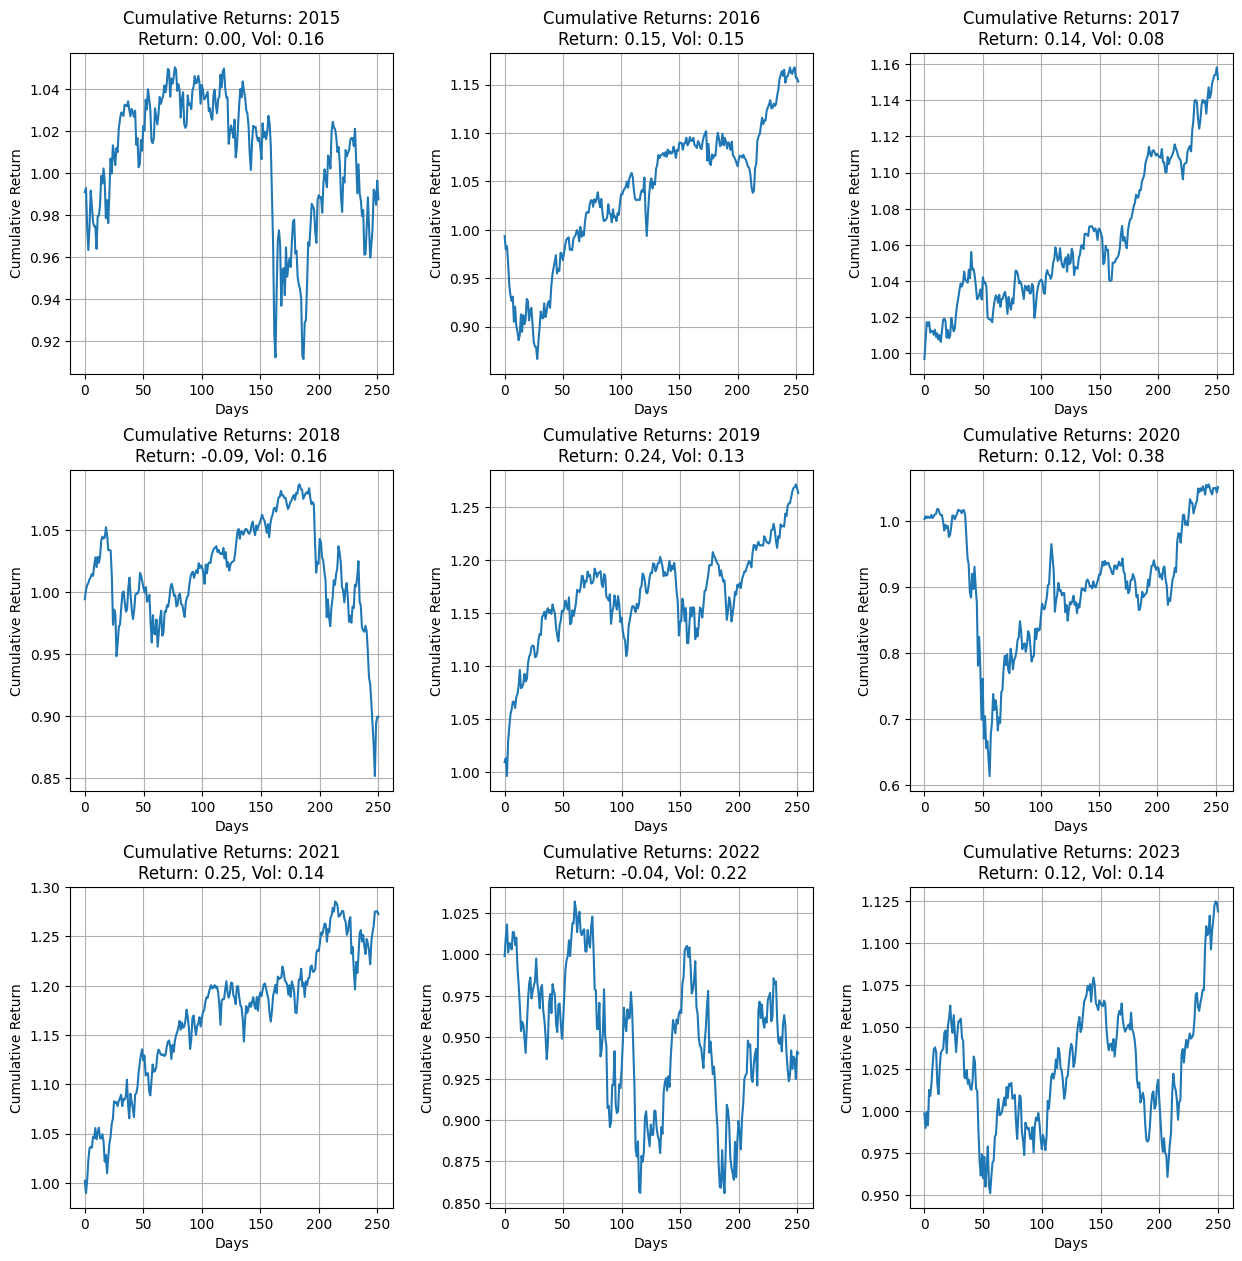

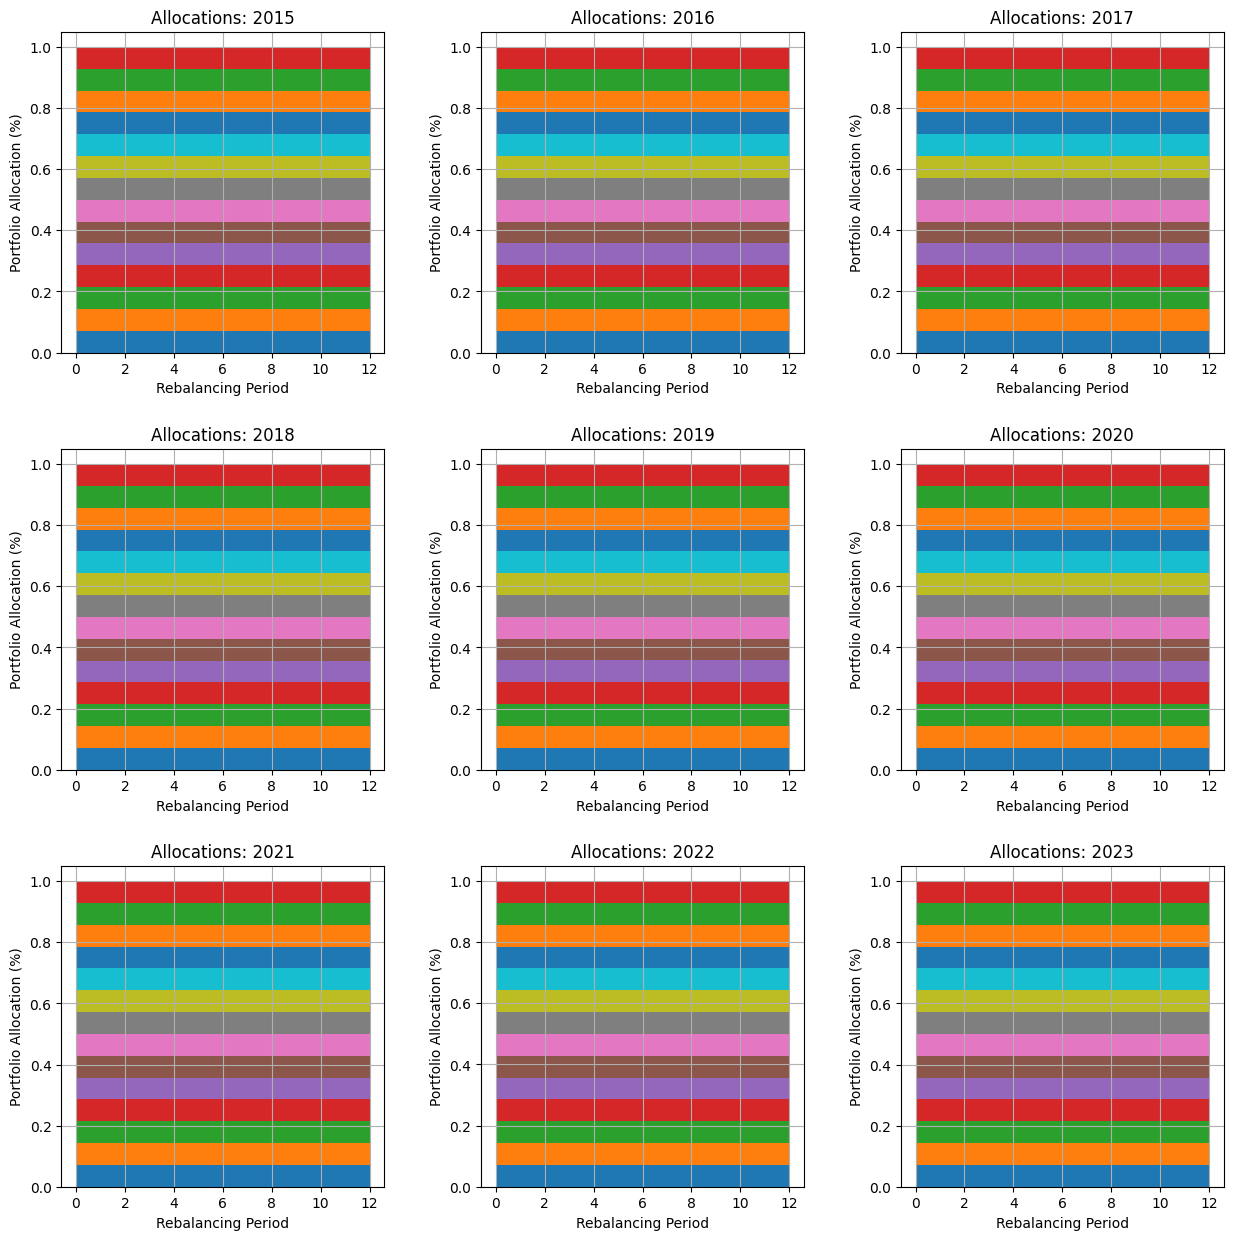

In [8]:
# Define the number of trading days per year
trading_days_per_year = 252

# Initialize lists to store statistics
all_stats = []

# Folder where the numpy files are stored
data_folder = "stats"

# Initialize a dictionary to hold imported data
all_portfolio_returns = {}
all_weight_history = {}

# Import data for "best" case
for i in range(1, 10):  # Periods 1 to 9
    returns_path = os.path.join(data_folder, f"last_portfolio_returns_7-{i}.npy")
    weights_path = os.path.join(data_folder, f"last_weight_history_7-{i}.npy")
    
    # Load the data
    portfolio_returns = np.load(returns_path)
    weight_history = np.load(weights_path)
    
    # Store in dictionaries
    all_portfolio_returns[i] = portfolio_returns
    all_weight_history[i] = weight_history

# Initialize a figure for the 3x3 grid layout
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Adjust size as needed
fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Add space between subplots

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop through each period for analysis
for idx, (period, returns) in enumerate(all_portfolio_returns.items()):
    # Calculate cumulative returns
    cumulative_return = np.cumprod(1 + returns)

    # Calculate annualized return
    annualized_return = np.mean(returns) * trading_days_per_year

    # Calculate annualized volatility
    annualized_volatility = np.std(returns) * np.sqrt(trading_days_per_year)

    # Calculate Sharpe ratio (assuming a risk-free rate of 0 for simplicity)
    sharpe_ratio = annualized_return / annualized_volatility if annualized_volatility != 0 else np.nan

    # Calculate the max drawdown
    max_drawdown = calculate_max_drawdown(returns)

    # Calculate Calmar ratio (handle divide by zero)
    calmar_ratio = annualized_return / max_drawdown if max_drawdown != 0 else np.nan

    # Store stats in a list
    all_stats.append({
        "Period": f"{2014 + idx + 1}",
        "Annualized Return": annualized_return,
        "Annualized Volatility": annualized_volatility,
        "Sharpe Ratio": sharpe_ratio,
        "Max Drawdown": max_drawdown,
        "Calmar Ratio": calmar_ratio
    })

    # Plot cumulative portfolio returns in the top row
    axes[idx].plot(cumulative_return)
    axes[idx].set_title(f"Cumulative Returns: {2015 + idx}\nReturn: {annualized_return:.2f}, Vol: {annualized_volatility:.2f}")
    axes[idx].set_xlabel("Days")
    axes[idx].set_ylabel("Cumulative Return")
    axes[idx].grid()

# Create a new figure for stacked area plots
fig_alloc, axes_alloc = plt.subplots(3, 3, figsize=(15, 15))  # Adjust size as needed
fig_alloc.subplots_adjust(hspace=0.3, wspace=0.3)  # Add space between subplots

# Flatten axes array for easy indexing
axes_alloc = axes_alloc.flatten()

# Loop through each period for allocation plots
for idx, (period, weight_history) in enumerate(all_weight_history.items()):
    num_rebalancing_periods, num_assets = weight_history.shape

    # Stacked area plot for portfolio allocations
    axes_alloc[idx].stackplot(range(num_rebalancing_periods), weight_history.T)
    axes_alloc[idx].set_title(f"Allocations: {2015 + idx}")
    axes_alloc[idx].set_xlabel("Rebalancing Period")
    axes_alloc[idx].set_ylabel("Portfolio Allocation (%)")
    axes_alloc[idx].grid()

# Show both figures
plt.show()

In [9]:
# Convert stats to a DataFrame for easier analysis and storage
stats_df = pd.DataFrame(all_stats)
stats_df

,Period,Annualized Return,Annualized Volatility,Sharpe Ratio,Max Drawdown,Calmar Ratio
0,2015,0.000083,0.159207,0.000524,0.132076,0.000632
1,2016,0.153202,0.150118,1.020542,0.127799,1.198771
2,2017,0.144180,0.076048,1.895909,0.036893,3.908069
3,2018,-0.093756,0.160107,-0.585580,0.217000,-0.432054
4,2019,0.242207,0.127045,1.906473,0.069386,3.490737
5,2020,0.123756,0.381130,0.324707,0.397925,0.311002
6,2021,0.251419,0.143503,1.752017,0.069324,3.626727
7,2022,-0.036863,0.222064,-0.166002,0.170716,-0.215933
8,2023,0.122917,0.141250,0.870211,0.109981,1.117618


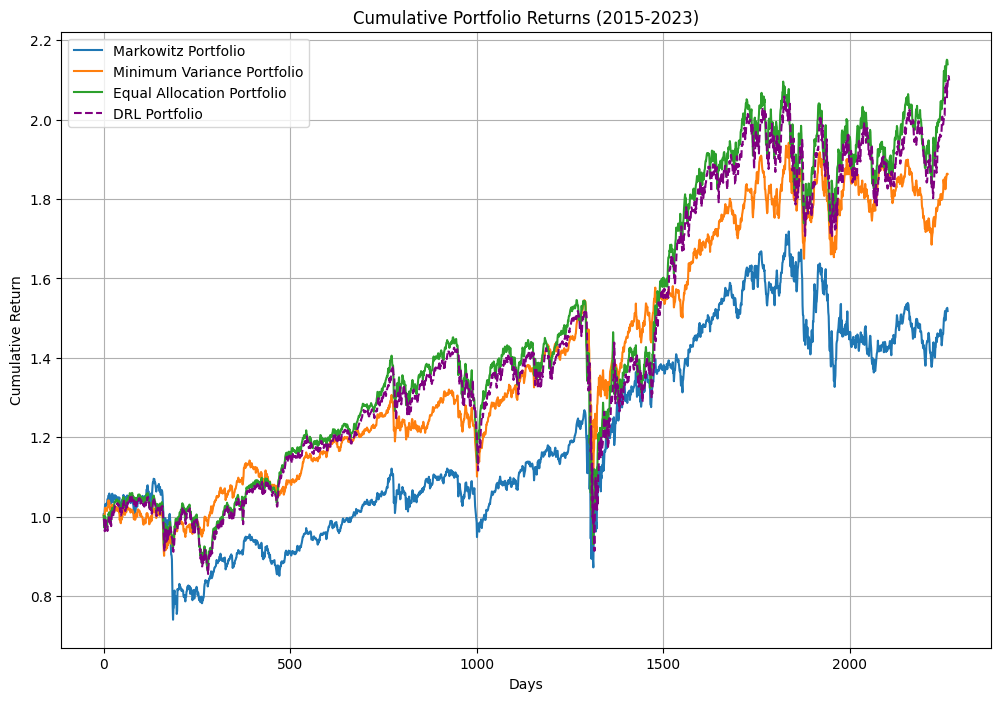

Final Cumulative Returns (2015-2023):
  Markowitz Portfolio: 1.5180
  Minimum Variance Portfolio: 1.8629
  Equal Allocation Portfolio: 2.1394
  DRL Portfolio: 2.0985


In [10]:
# Load the saved portfolio returns
marko_returns = np.load("stats/portfolio_returns_marko.npy")
mv_returns = np.load("stats/portfolio_returns_mv.npy")
equal_returns = np.load("stats/portfolio_returns_equal.npy")

# Append DRL portfolio returns for all periods
drl_returns = np.concatenate(list(all_portfolio_returns.values()))

# Calculate cumulative returns for each strategy
cumulative_returns_marko = np.cumprod(1 + marko_returns)
cumulative_returns_mv = np.cumprod(1 + mv_returns)
cumulative_returns_equal = np.cumprod(1 + equal_returns)
cumulative_returns_drl = np.cumprod(1 + drl_returns)

# Plot cumulative returns for all strategies
plt.figure(figsize=(12, 8))
plt.plot(cumulative_returns_marko, label="Markowitz Portfolio")
plt.plot(cumulative_returns_mv, label="Minimum Variance Portfolio")
plt.plot(cumulative_returns_equal, label="Equal Allocation Portfolio")
plt.plot(cumulative_returns_drl, label="DRL Portfolio", linestyle='--', color='purple')
plt.xlabel("Days")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Portfolio Returns (2015-2023)")
plt.grid()
plt.legend()
plt.show()

# Display the final cumulative returns for each strategy
final_cumulative_return_marko = cumulative_returns_marko[-1]
final_cumulative_return_mv = cumulative_returns_mv[-1]
final_cumulative_return_equal = cumulative_returns_equal[-1]
final_cumulative_return_drl = cumulative_returns_drl[-1]

print("Final Cumulative Returns (2015-2023):")
print(f"  Markowitz Portfolio: {final_cumulative_return_marko:.4f}")
print(f"  Minimum Variance Portfolio: {final_cumulative_return_mv:.4f}")
print(f"  Equal Allocation Portfolio: {final_cumulative_return_equal:.4f}")
print(f"  DRL Portfolio: {final_cumulative_return_drl:.4f}")

In [11]:
# Calculate stats for each portfolio
drl_stats = calculate_portfolio_stats(drl_returns)
markowitz_stats = calculate_portfolio_stats(marko_returns)
min_variance_stats = calculate_portfolio_stats(mv_returns)
equal_weight_stats = calculate_portfolio_stats(equal_returns)

# Combine stats into a DataFrame
stats_df = pd.DataFrame({
    "DRL Portfolio": drl_stats,
    "Markowitz Portfolio": markowitz_stats,
    "Minimum Variance Portfolio": min_variance_stats,
    "Equal Weight Portfolio": equal_weight_stats
}).T

stats_df

,Final Cumulative Return,Annualized Return,Annualized Volatility,Sharpe Ratio,Max Drawdown,Calmar Ratio
DRL Portfolio,2.098470,0.100903,0.191920,0.525756,0.397925,0.253573
Markowitz Portfolio,1.518049,0.063587,0.184459,0.344723,0.324021,0.196244
Minimum Variance Portfolio,1.862903,0.080247,0.147926,0.542482,0.299670,0.267784
Equal Weight Portfolio,2.139356,0.103222,0.192047,0.537484,0.397926,0.259400
